<a href="https://colab.research.google.com/github/Abugahh/Network-Anomaly-Detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the dataset

## Cyber attack data

* The data is collected by the University of New South Wales (Australia). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data.

* The dataset includes nine types of attacks, including:

1. Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

2. Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

3. Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.

4. DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

5. Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

6. Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

7. Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

8. Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

9. Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

* These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

In [ ]:
##Fetures reading columns
import chardet
import pandas as pd

with open('NUSW-NB15_features (1).csv', 'rb') as f:
  result = chardet.detect(f.read())
  encoding = result['encoding']

df = pd.read_csv('NUSW-NB15_features (1).csv', encoding=encoding)

df.head(49)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
training = pd.read_csv('UNSW_NB15_training-set (1).csv')
testing = pd.read_csv('UNSW_NB15_testing-set (1).csv')

print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (89838, 45)


In [ ]:
df.head(1000)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1.183870,tcp,-,FIN,14,14,784,764,22.806559,...,1,3,0,0,0,2,4,0,Fuzzers,1
996,997,0.195360,tcp,http,FIN,10,6,1330,268,76.781325,...,1,1,0,0,1,1,1,0,Exploits,1
997,998,0.230088,tcp,http,FIN,10,10,816,5840,82.577103,...,1,1,0,0,1,1,1,0,Exploits,1
998,999,0.212793,tcp,http,FIN,12,20,876,19342,145.681489,...,1,1,0,0,1,2,1,0,DoS,1


In [ ]:
#Concatinating the dataframe
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


In [ ]:
# Count the number of null values in each column
# df.isnull().sum()

# Count the number of null values in each row
df.isnull().sum(axis=1)


0          0
1          0
2          0
3          0
4          0
          ..
172165     0
172166     0
172167     0
172168     0
172169    17
Length: 172170, dtype: int64

In [ ]:
df.shape

(172170, 44)

In [ ]:
df.dtypes


dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_l

In [ ]:
## converting object/categorical data to numbers

for col in ['proto', 'service', 'state']:
      df[col] = df[col].astype('category').cat.codes
##.cat.codes attribute to replace the categorical values with numerical codes.

df['attack_cat'] = df['attack_cat'].astype('category') ##retains as cat

In [ ]:
df.dtypes

dur                   float64
proto                   int16
service                  int8
state                    int8
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                 float64
trans_depth           float64
response_body_len     float64
ct_srv_src            float64
ct_state_ttl          float64
ct_dst_ltm            float64
ct_src_dpo

Exploits          27292
Generic           18871
Fuzzers           15222
DoS                9537
Reconnaissance     8350
Analysis           1745
Backdoor           1420
Shellcode           916
Worms               107
Normal                0
Name: attack_cat, dtype: int64


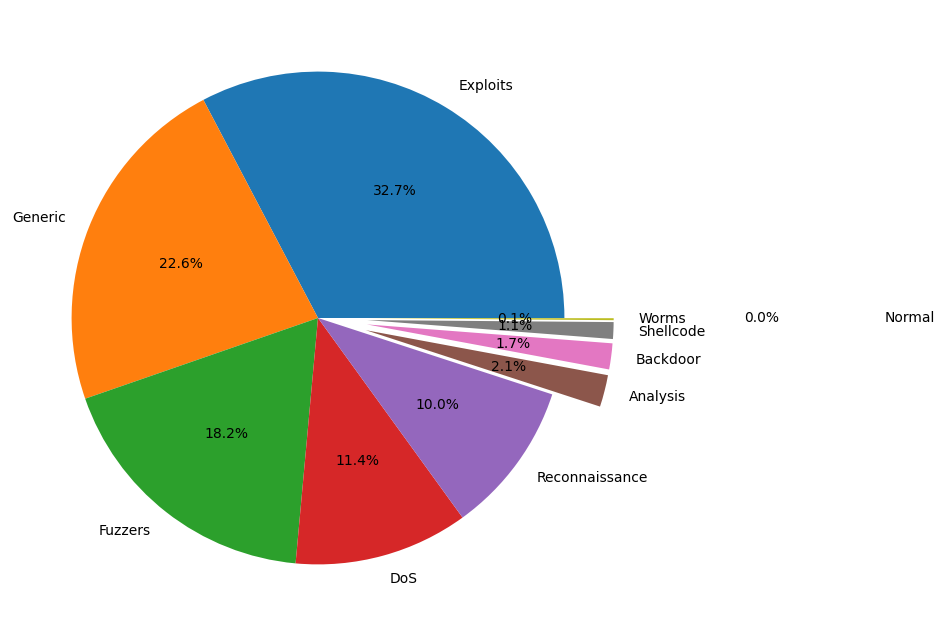

In [ ]:
import matplotlib.pyplot as plt

validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

#The subset is obtained by selecting the rows where the column label is equal to 1, and then selecting the column attack_cat. The value_counts() method returns a series that contains the frequency of each unique value in the column.

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172170 entries, 0 to 172169
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                172170 non-null  float64 
 1   proto              172170 non-null  int16   
 2   service            172170 non-null  int8    
 3   state              172170 non-null  int8    
 4   spkts              172170 non-null  int64   
 5   dpkts              172170 non-null  int64   
 6   sbytes             172170 non-null  int64   
 7   dbytes             172170 non-null  int64   
 8   rate               172170 non-null  float64 
 9   sttl               172170 non-null  int64   
 10  dttl               172170 non-null  int64   
 11  sload              172170 non-null  float64 
 12  dload              172170 non-null  float64 
 13  sloss              172170 non-null  int64   
 14  dloss              172170 non-null  int64   
 15  sinpkt             172170 non-null

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label']) ##all columns except 42 and 43 since were predicting the type of attack
y = df['label'].values ## predict whether it is 0 or 1  label column into a numpy array by values cause
#. A numpy array is more efficient and compatible for numerical computations than a pandas series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (120519, 42)
y_train shape:  (120519,)
X_test shape:  (51651, 42)
y_test shape:  (51651,)


In [ ]:
# Create a random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', random_state=11)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

ValueError: ignored